In [15]:
# Dependencies

import pandas as pd
import psycopg2
import sqlalchemy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# SQL Alchemy
from sqlalchemy import create_engine
POSTGRES_ADDRESS = 'localhost'
POSTGRES_PORT = '5432'
POSTGRES_USERNAME = 'postgres' 
POSTGRES_PASSWORD = 'Loveyou21!' 
POSTGRES_DBNAME = 'sql-challenge'
postgres = ('postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}'
            .format(username=POSTGRES_USERNAME,
            password=POSTGRES_PASSWORD,
           ipaddress=POSTGRES_ADDRESS,
           port=POSTGRES_PORT,
           dbname=POSTGRES_DBNAME))
cnx = create_engine(postgres)

In [16]:
salaries = pd.read_sql('SELECT * FROM "Salaries"', cnx)
salaries.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12


In [17]:
employees = pd.read_sql('SELECT * FROM "Employees"', cnx)
employees.head()

,emp_no,birthdate,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [18]:
titles = pd.read_sql('SELECT * FROM "Titles"', cnx)
titles.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


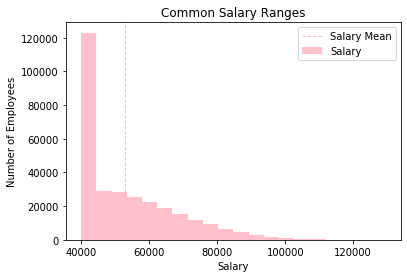

In [23]:
# 1: Create a histogram to visualize the most common salary ranges for employees.

plt.hist(salaries['salary'], 20, density=False, label="Salary", color='pink')
plt.axvline(salaries['salary'].mean(), linestyle='dashed', linewidth=1, label="Salary Mean", color='pink')
plt.xlabel("Salary")
plt.ylabel("Number of Employees")
plt.legend() 
plt.title("Common Salary Ranges")
plt.savefig("Common Salary Ranges.png")

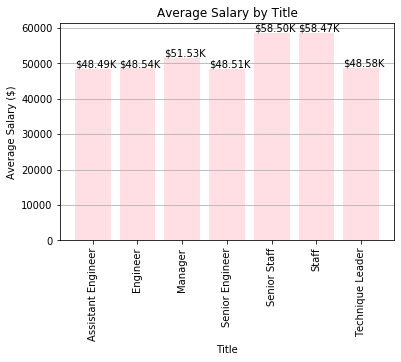

In [29]:
# 2. Create a bar chart of average salary by title.

# Create the query
query = pd.read_sql('SELECT * FROM "Salaries" INNER JOIN "Titles" ON "Salaries".emp_no = "Titles".emp_no', cnx)

# Store the query
average_salaries_by_title = query.groupby(["title"]).mean()["salary"]

# Plot the Barchart
title_list = average_salaries_by_title.index
average_salary_for_title = average_salaries_by_title.values

x_axis = np.arange(len(title_list))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, title_list, rotation=90)
plt.title("Average Salary by Title")
plt.xlabel("Title")
plt.ylabel("Average Salary ($)")
plt.grid(axis="y")
chart = plt.bar(x_axis, average_salary_for_title, color='pink', alpha=0.5, align="center")

for i in chart:
    yvalue = i.get_height()
    plt.text(i.get_x(), yvalue + 500, "${:,.2f}K".format(yvalue/1000))
    
plt.savefig("Average Salary by Title.png")
plt.show()